In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
# Check for null values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
# Check for duplicates
df.duplicated().sum()

1332

In [5]:
# Remove duplicates to remove bias
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [7]:
print("Shape of the dataset:", df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] - 1)  # Excluding the target column
print("Classes:", df['letter'].unique())

Shape of the dataset: (18668, 17)
Number of samples: 18668
Number of features: 16
Classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


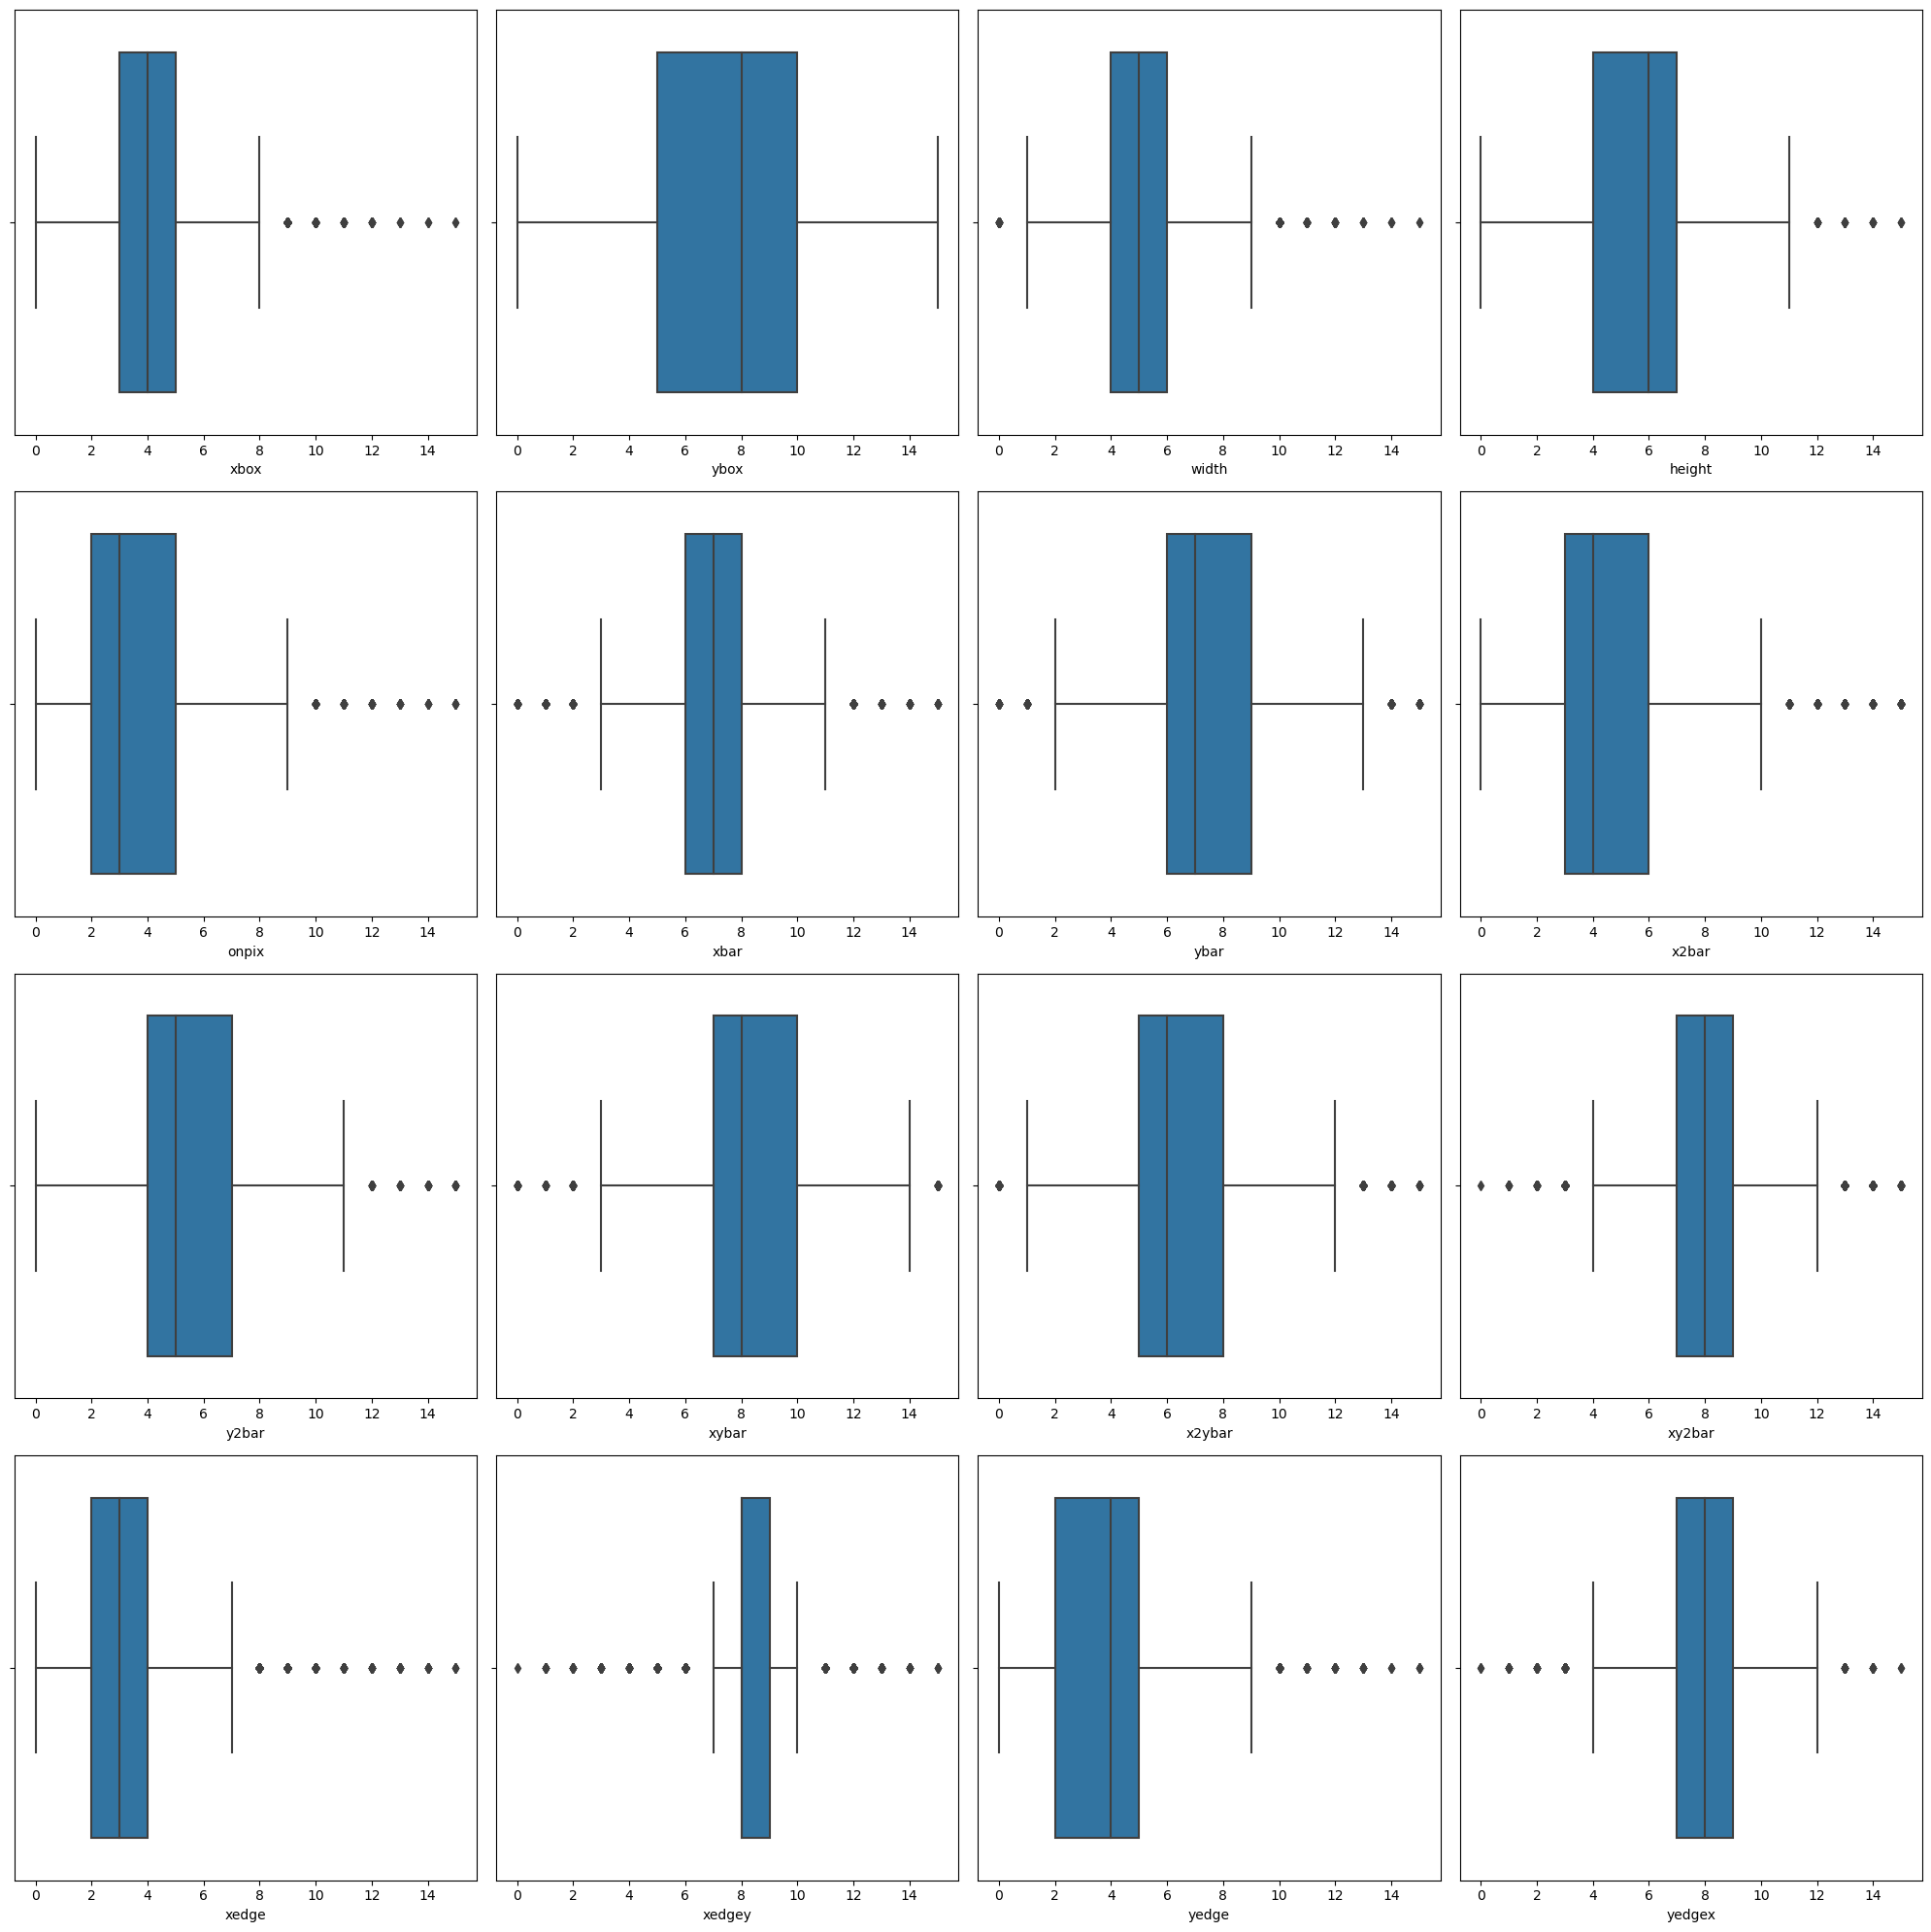

In [8]:
# Plotting boxplots to check the distribution of numerical columns
cols = df.columns[1:].tolist()  # Exclude the last column
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns for the subplots
r = c = 0
for col in cols:
    sns.boxplot(x=col, data=df, ax=ax[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(df.drop(columns=['letter']))

In [10]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder
# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [12]:
# Model Implementation

# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']

In [13]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

In [14]:
# Initialize the ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer and first hidden layer
model.add(Dense(units=26, activation='softmax'))  # Output layer (26 classes for each letter of the alphabet)

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Model Training

from sklearn.neural_network import MLPClassifier

ann_classifier = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100)
ann_classifier.fit(X_train, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

In [16]:
y_pred = ann_classifier.predict(X_test)

In [17]:
# Print the classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.82      0.89      0.85       144
           B       0.66      0.79      0.72       156
           C       0.78      0.76      0.77       147
           D       0.75      0.77      0.76       163
           E       0.74      0.77      0.76       144
           F       0.78      0.77      0.77       146
           G       0.69      0.61      0.64       173
           H       0.66      0.60      0.63       133
           I       0.82      0.77      0.79       108
           J       0.82      0.80      0.81       150
           K       0.70      0.85      0.77       149
           L       0.87      0.84      0.86       147
           M       0.89      0.86      0.88       143
           N       0.75      0.80      0.78       138
           O       0.69      0.65      0.67       131
           P       0.84      0.80      0.82       161
           Q       0.76      0.70      0.73       145
    

In [18]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
#Defining  the parameter grid here

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [19]:
# Creating  a grid search object
grid_search = GridSearchCV(ann_classifier, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [20]:
#Evaluating  the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Best Cross-Validation Score: 0.945962233828847


In [26]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.99      0.98       144
           B       0.93      0.96      0.94       156
           C       0.96      0.96      0.96       147
           D       0.95      0.97      0.96       163
           E       0.94      0.94      0.94       144
           F       0.93      0.95      0.94       146
           G       0.94      0.95      0.95       173
           H       0.95      0.89      0.92       133
           I       0.96      0.94      0.95       108
           J       0.96      0.95      0.95       150
           K       0.96      0.96      0.96       149
           L       0.95      0.97      0.96       147
           M       0.99      0.99      0.99       143
           N       0.96      0.96      0.96       138
           O       0.93      0.95      0.94       131
           P       0.94      0.94      0.94       161
           Q       0.95      0.95      0.95       145
    

In [27]:
# Evaluation

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Default model evaluation
y_pred_default = ann_classifier.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

In [29]:
# Tuned model evaluation
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

In [30]:
# Print the evaluation metrics
print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1-score:", f1_default)

Default Model:
Accuracy: 0.7600428494911623
Precision: 0.7607780874208764
Recall: 0.7600428494911623
F1-score: 0.7590032425123328


In [31]:
print("Tuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)

Tuned Model:
Accuracy: 0.9558114622388859
Precision: 0.9558904531335639
Recall: 0.9558114622388859
F1-score: 0.9557549893779872
